## Add Shape noise to the images

In this notebook we add shape noise to the weak lensing mass maps and save them into a numpy file.

In [1]:
#! apt-get update
#! sudo apt-get install texlive-latex-recommended 
#! sudo apt install texlive-latex-extra
#! sudo apt install dvipng
#!apt install cm-super
#!pip install chainconsumer

In [2]:
# Install healpy - you will have to restart the runtime for this to be effective.
#!pip install --user healpy

In [3]:
# Import packages
import numpy as np
from chainconsumer import ChainConsumer
import healpy as hp


# Import matplotlib 
# Matplotlib, seaborn and plot pretty 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'

# Adjust rc parameters to make plots pretty
def plot_pretty(dpi=200, fontsize=9):
    

    plt.rc("savefig", dpi=dpi)       # dpi resolution of saved image files
    plt.rc('text', usetex=True)      # use LaTeX to process labels
    plt.rc('font', size=fontsize)    # fontsize
    plt.rc('xtick', direction='in')  # make axes ticks point inward
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=10) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=10) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [0.5, 1.1]) # fix dotted lines

    return

plot_pretty()

# Pillow
from PIL import Image

### Import datasets

In [4]:
# Mount drive to upload the datasets
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Define the path to the datasets
DATA_PATH = '/content/drive/My Drive/Maps_Project/Deliverables_Maps/Datasets/'

# IMAGE PATH 
IMG_PATH = '/content/drive/My Drive/Maps_Project/Deliverables_Maps/Plots/'

In [7]:
# Maps 
X_maps = np.float64(np.load(DATA_PATH+"X_maps_Cosmogrid_100k.npy",mmap_mode='r'))

# Labels
y_labels = np.float64(np.load(DATA_PATH+"y_maps_Cosmogrid_100k.npy"))

In [8]:
# There are definitions used to create the standard deviation of noise

sigmae = 0.314
smoothing = hp.nside2resol(512, arcmin=True)
neff = 4*1.461 * (smoothing**2)

# This is DES level shape noise
snv = sigmae / np.sqrt(2 * np.pi * neff)

In [9]:
# Create noise maps
noise_map = np.random.normal(0.0,snv,np.shape(X_maps))

# Add the noise to the original maps to create the noisy maps
X_maps_noisy = np.copy(X_maps)+np.copy(noise_map) 

In [10]:
# Print their noise
print(np.shape(X_maps_noisy))

(100000, 66, 66)


### Make a plot of a few patches - first noiseless

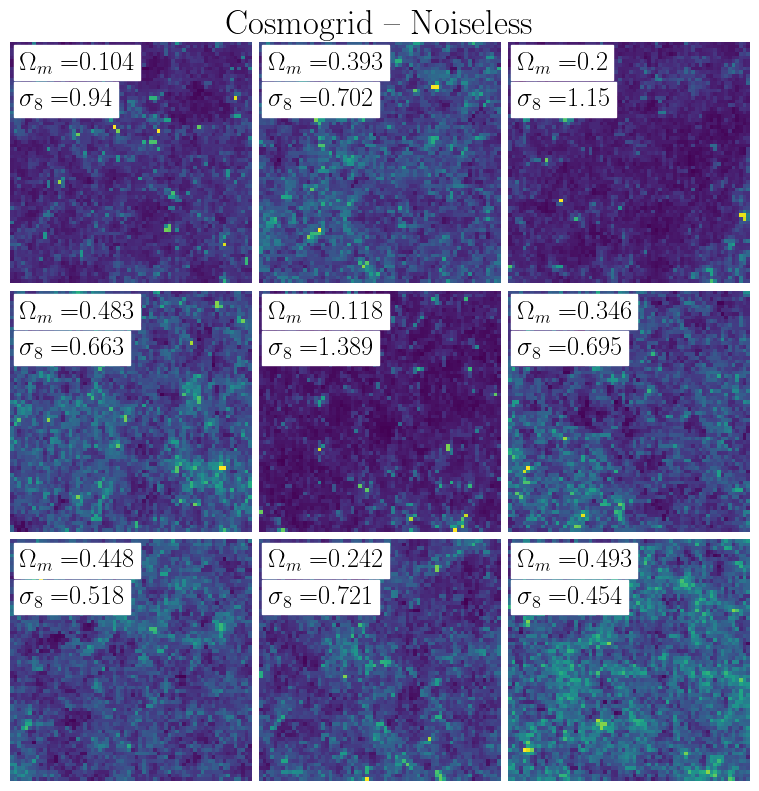

In [14]:
n_rows = 3
n_cols = 3

plt.figure(figsize=(4*n_cols*0.8, 4*n_rows*0.8))

for i in range(n_rows*n_cols):
    if (i==2):
        plt.title("Cosmogrid -- Noiseless",fontsize=25)

    # Get Omega_m and sigma_8
    Omega_m = str(np.round(y_labels[i,0],3))
    Sigma_8 = str(np.round(y_labels[i,3],3))


    plt.subplot(n_rows, n_cols, i+1)

    plt.text(2,7,'$\Omega_m=$'+str(Omega_m),c='k',fontsize=19, fontweight='black',backgroundcolor='w')
    plt.text(2,17,'$\sigma_8=$'+str(Sigma_8),c='k',fontsize=19, fontweight='black',backgroundcolor='w')
    plt.imshow(X_maps[i]/430.)
    plt.axis('off')


plt.subplots_adjust(wspace=0.01, hspace=0.03)
plt.savefig(IMG_PATH+"Maps_Cosmogrid_examples_noiseless.pdf")
plt.show()

### Now make a plot of the shame patches but with shape noise

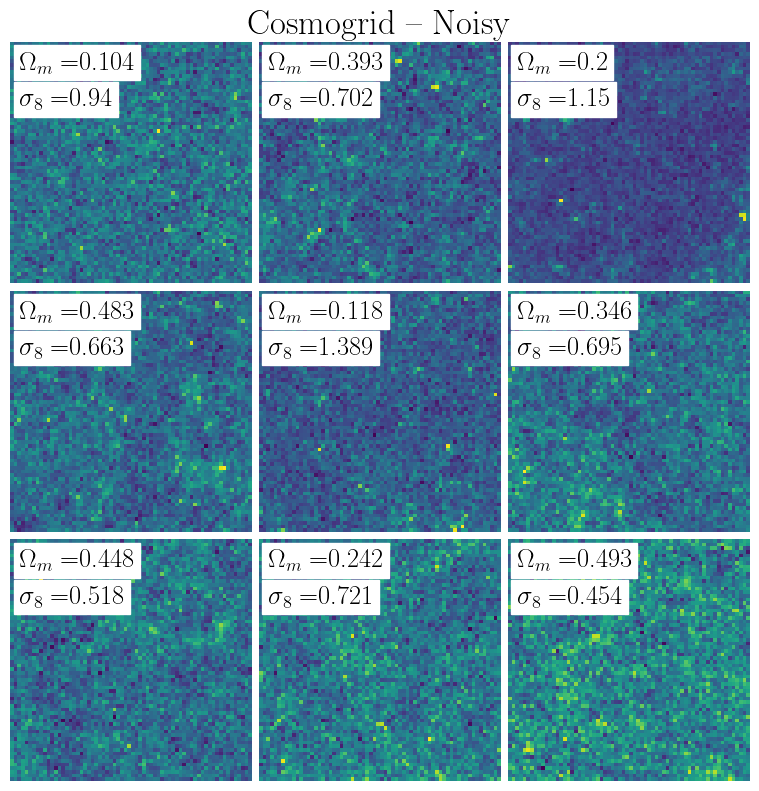

In [15]:
n_rows = 3
n_cols = 3

plt.figure(figsize=(4*n_cols*0.8, 4*n_rows*0.8))

for i in range(n_rows*n_cols):
    if (i==2):
        plt.title("Cosmogrid -- Noisy",fontsize=25)

    # Get Omega_m and sigma_8
    Omega_m = str(np.round(y_labels[i,0],3))
    Sigma_8 = str(np.round(y_labels[i,3],3))


    plt.subplot(n_rows, n_cols, i+1)

    plt.text(2,7,'$\Omega_m=$'+str(Omega_m),c='k',fontsize=19, fontweight='black',backgroundcolor='w')
    plt.text(2,17,'$\sigma_8=$'+str(Sigma_8),c='k',fontsize=19, fontweight='black',backgroundcolor='w')
    plt.imshow(X_maps_noisy[i]/430.)
    plt.axis('off')


plt.subplots_adjust(wspace=0.01, hspace=0.03)
plt.savefig(IMG_PATH+"Maps_Cosmogrid_examples_noisy.pdf")
plt.show()

In [16]:
# Save the noisy maps
np.save(DATA_PATH+"X_maps_Cosmogrid_100k_NOISY",X_maps_noisy)